In [158]:
import experiment
import models

from experiment import *

In [159]:
sim = Exp()
concs = np.geomspace(0.1, 100, 10)
concs = [c*0.1e-6 for c in concs]

start = 0
stop = 100000
for c in concs:
    sim.add_dataset(np.linspace(start,stop*2,stop), np.linspace(start,stop*2,stop))
    sim.datasets[-1].add_step(start, stop, c)
    sim.datasets[-1].add_step(stop, stop*2, 0)



In [172]:
sim.model = models.Heterogeneous_ligand()
try:
    sim.model.params_definitions['ymax1'].user_data['type']='global'
    sim.model.params_definitions['ymax2'].user_data['type']='global'
except:
    sim.model.params_definitions['ymax'].user_data['type']='global'
sim.create_params()


In [161]:
ys = []
s='''ymax3_ds0 	0.14092092 	0.00242738 	(1.72%) 	1 	1.0000e-12 	10.0000000 	True
ymax3_ds1 	0.14962366 	0.00260081 	(1.74%) 	1 	1.0000e-12 	10.0000000 	True
ymax3_ds3 	0.33711756 	0.00497429 	(1.48%) 	1 	1.0000e-12 	10.0000000 	True
ymax3_ds4 	1.0000e-12 	0.00228196 	(228195516553.39%) 	1 	1.0000e-12 	10.0000000 	True
ymax3_ds5 	4.0429e-07 	0.00261911 	(647836.83%) 	1 	1.0000e-12 	10.0000000 	True
ymax3_ds6 	0.01029767 	0.00265927 	(25.82%) 	1 	1.0000e-12 	10.0000000 	True
ymax3_ds7 	0.24237597 	0.00277593 	(1.15%) 	1 	1.0000e-12 	10.0000000 	True
ymax3_ds8 	0.22799245 	0.00272230 	(1.19%) 	1 	1.0000e-12 	10.0000000 	True
ymax3_ds10 	3.4728e-12 	0.00245354 	(70649919360.89%) 	1 	1.0000e-12 	10.0000000 	True
ymax3_ds11 	0.36969981 	0.00431474 	(1.17%) 	1 	1.0000e-12 	10.0000000 	True '''

for line in s.split('\n'):
    ys.append(float(line.split()[1]))

sum(ys)/len(ys)


0.14780284442944727

In [162]:
sim.params['ka1'].value =  15761.3551
sim.params['kd1'].value = 	0.02925087
sim.params['ka2'].value =	2735.57270
sim.params['kd2'].value =		0.00314228
sim.params['ka3'].value =			2904.24749
sim.params['kd3'].value =	0.01096344
try:
    sim.params['ymax'].value = 0.579625327
except:
    sim.params['ymax1'].value = 0.8750079500001
    sim.params['ymax2'].value = 2.872040026
    sim.params['ymax2'].value = 0.14780284442944727

    # sim.params['ymax1'].value = 1
    # sim.params['ymax2'].value = 0.2

#ymax = sim.params['ymax'].value

In [163]:
sim.params

name,value,initial value,min,max,vary
ka1,15761.3551,10000.0,10.0000000,10000000.0,True
kd1,0.02925087,0.01,1.0000e-06,0.10000000,True
ka2,2735.57270,10000.0,10.0000000,10000000.0,True
kd2,0.00314228,0.01,1.0000e-06,0.10000000,True
ka3,318808.108,10000.0,10.0000000,10000000.0,True
kd3,1.8718e-04,0.01,1.0000e-06,0.10000000,True
ymax1,0.87500795,1,1.0000e-12,10.0000000,True
ymax2,2.87204003,1,1.0000e-12,10.0000000,True
ymax3,0.14780284,1,1.0000e-12,10.0000000,True


In [164]:
sim.simulate_response(None, 0, 0)

(<Figure size 640x480 with 1 Axes>, <Axes: >)

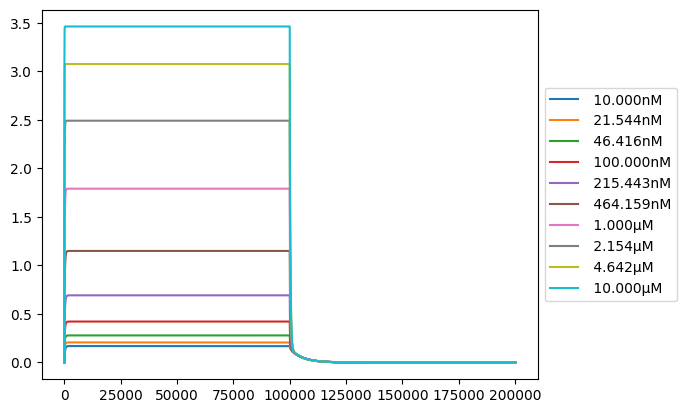

In [165]:
sim.plot()

In [166]:
xs = []
ys = []
for ds in sim:
    xs.append(ds.steps[0].concentration)
    t = ds.t>=ds.steps[0].stop
    y = ds.response[t][0]
    ys.append(y)


[1.02678888e-06]
R² = 0.9951930239936146


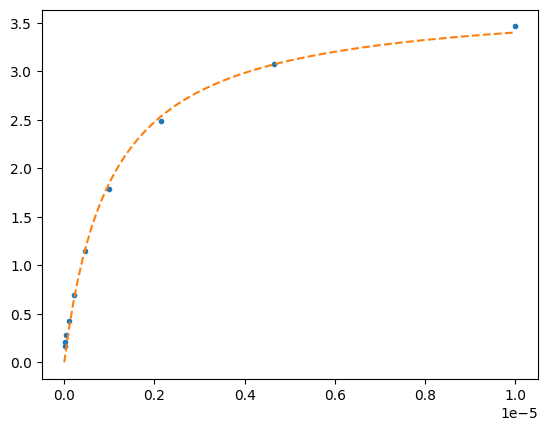

In [167]:
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt

xs = np.array(xs)
ys = np.array(ys)

xs_fitted = np.linspace(0, xs[-1], num=100)

def func(x, Kd):
    return ymax*x/(Kd+x)

p0 = (1e-6)

params, cv = scipy.optimize.curve_fit(func, xs, ys, p0)
print(params)
# perform the fit
Kd = params[0]


# determine quality of the fit
squaredDiffs = np.square(ys - func(xs, Kd))
squaredDiffsFromMean = np.square(ys - np.mean(ys))
rSquared = 1 - np.sum(squaredDiffs) / np.sum(squaredDiffsFromMean)
print(f"R² = {rSquared}")

# plot the results
plt.plot(xs, ys, '.', label="data")
plt.plot(xs_fitted, func(xs_fitted, Kd), '--', label="fitted")
# plt.title(f"Y = {Rmax:.2f} * e^(-{Kd:.2f} * t)")

# inspect the parameters


plt.show()


1e-08 0.16908310202256982 5e-09
1.5000000000000002e-08 0.18627227705603797 5e-09
2e-08 0.20206721687206025 5e-09
2.5e-08 0.21721806707143243 5e-09
3e-08 0.2319853913299977 5e-09
3.4999999999999996e-08 0.2464840871310885 5e-09
3.9999999999999994e-08 0.2607730963072528 5e-09
4.499999999999999e-08 0.27488607912381435 5e-09
4.999999999999999e-08 0.28884389778453656 5e-09
5.499999999999999e-08 0.3026603629082049 5e-09
6e-08 0.31634513482022486 5e-09
6.5e-08 0.329905297961991 5e-09
7e-08 0.34334626633584764 5e-09
7.500000000000001e-08 0.3566723297396489 5e-09
8.000000000000001e-08 0.3698869967964268 5e-09
8.500000000000002e-08 0.3829932178740637 5e-09
9.000000000000003e-08 0.395993534298274 5e-09
9.500000000000003e-08 0.40889018084407885 5e-09
1.0000000000000004e-07 0.4216851577599844 5e-09
1.0500000000000004e-07 0.43438028242150906 5e-09
1.1000000000000005e-07 0.44697722705877413 5e-09
1.1500000000000005e-07 0.4594775467726883 5e-09
1.2000000000000004e-07 0.4718827006563163 5e-09
1.25000000

(<Figure size 640x480 with 1 Axes>, <Axes: >)

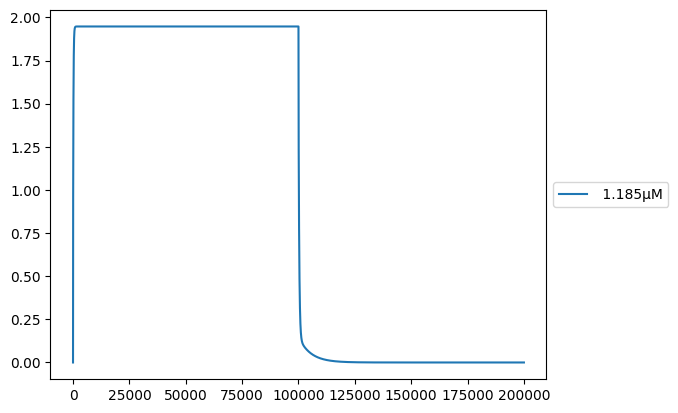

In [170]:
c=concs[0]
t = sim.datasets[0].t<=sim.datasets[0].steps[0].stop
start = sim.datasets[0].steps[0].start
stop = sim.datasets[0].steps[0].stop
diff = c/2
try:
    ymax = sim.params['ymax'].value
except:
    ymax = sim.params['ymax1'].value+sim.params['ymax2'].value+sim.params['ymax3'].value

for i in range(1000):
    temp = Exp()
    temp.model = sim.model
    temp.params = sim.params
    temp.add_dataset(np.linspace(start,stop*2,stop), np.linspace(start,stop*2,stop))
    temp.datasets[-1].add_step(start, stop, c)
    temp.datasets[-1].add_step(stop, stop*2, 0)
    temp.simulate_response(None, 0, 0)
    y = temp.datasets[0].response[t][-1]
    print(c, y, diff)
    
    if y<ymax/2:
        c=c+diff
    else:
        c=c-diff/2
        diff = diff/2

temp.plot()

In [169]:
ymax

3.8948508204295473

In [80]:
	2.4746e-05/	261482.150

9.463743509834228e-11

In [494]:
ds.response[t][0]

0.0

In [188]:
start = 0
stop = 100000
for c in concs:
    sim.add_dataset(np.linspace(start,stop,stop), np.linspace(1000,2000,1000))
    sim.datasets[-1].add_step(start, stop-1000, c)
    sim.datasets[-1].add_step(stop-1000, stop, 0)